## Prueba de normalidad

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('C:/Users/Francisco Valerio/Desktop/Work work/Atco/GDMTH-Project/notebooks/datos_2021.csv')

In [3]:
normality_results = {}

for column in ['base', 'intermedia', 'punta', 'distribucion', 'capacidad']:

    stat, p_value = shapiro(data[column].dropna())

    normality_results[column] = {'W-statistic': stat, 'p-value': p_value}

for variable, result in normality_results.items():

    print(f"{variable} -> W-statistic: {result['W-statistic']}, p-value: {result['p-value']}")

base -> W-statistic: 0.5776413307153216, p-value: 1.3637584020691544e-113
intermedia -> W-statistic: 0.8367339360750901, p-value: 1.5724199115372193e-89
punta -> W-statistic: 0.6694457198880917, p-value: 4.1484694989059604e-107
distribucion -> W-statistic: 0.8419971659093151, p-value: 9.422865012515325e-89
capacidad -> W-statistic: 0.6912580594193073, p-value: 2.4501973098713632e-105


c:\Users\Francisco Valerio\Desktop\Work work\Atco\GDMTH-Project\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21421.
  res = hypotest_fun_out(*samples, **kwds)


## Resultados

- W-statistic: los valores cercanos a 1, indicarían que los datos se aproximan a una distribución normal. En este caso, los valores son significativamente más bajos, lo que sugiere que los datos no se ajustan bien a una distribución normal.

- p-value: todos los valores $p$ son extremadamente bajos (p <<< 0.05), por lo que existe suficiente evidencia para rechazar la hipótesis nula de que los datos siguen una distribución normal

## Conclusión

Ninguna de las tarifas analizadas sigue una distribución normal. Esto sugiere que podria ser más adecuado utilizar técnicas no paramétricas o transformaciones de datos para análisis futuros.

## Análisis de correlación

In [5]:
correlation_matrix = data[['base', 'intermedia', 'punta', 'distribucion', 'capacidad']].corr()

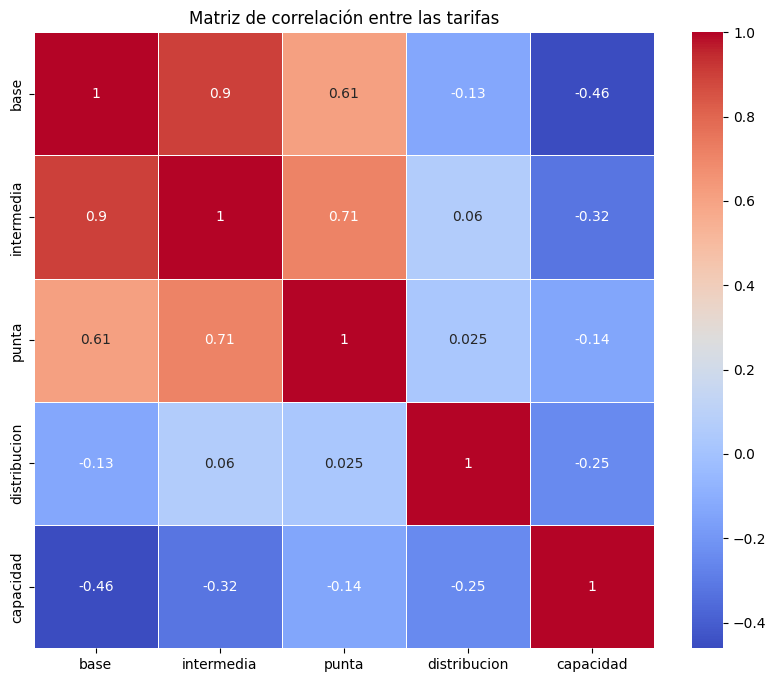

In [6]:
plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Matriz de correlación entre las tarifas')

plt.show()


## Outliers

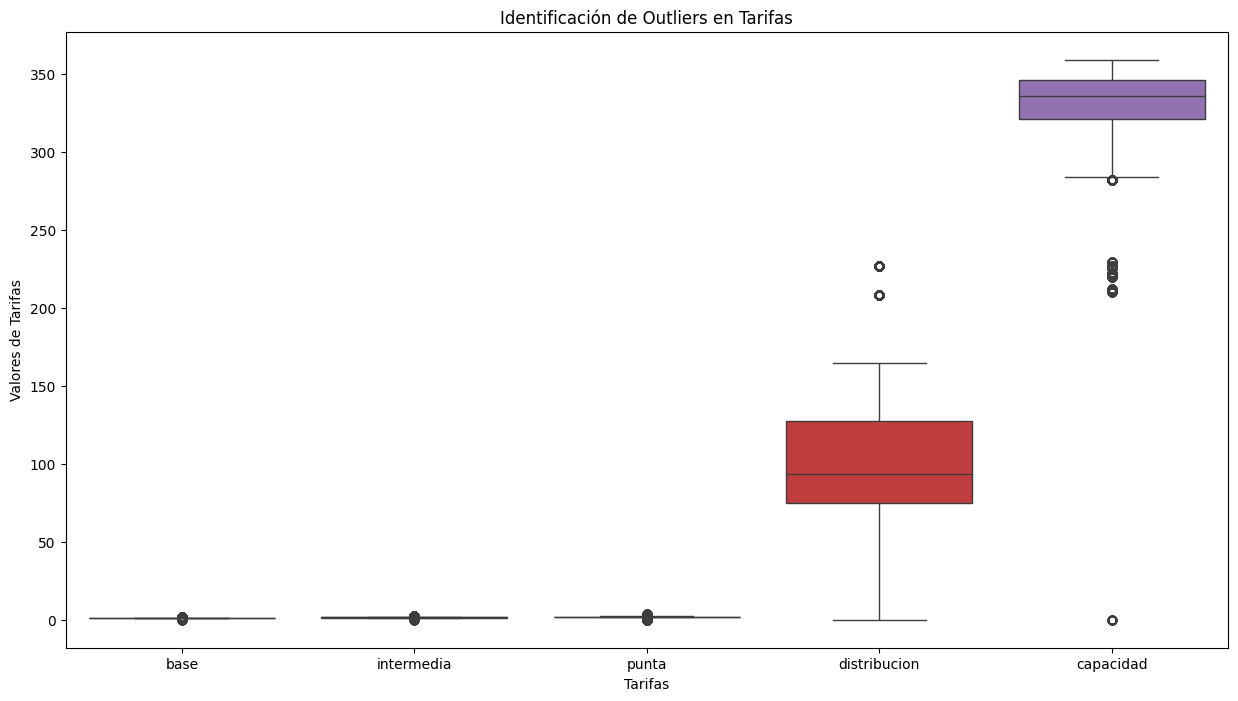

In [7]:
# Configuramos el tamaño de la figura
plt.figure(figsize=(15, 8))

# Creamos un boxplot para cada una de las tarifas
sns.boxplot(data=data[['base', 'intermedia', 'punta', 'distribucion', 'capacidad']])

# Títulos y etiquetas
plt.title('Identificación de Outliers en Tarifas')
plt.xlabel('Tarifas')
plt.ylabel('Valores de Tarifas')
plt.show()

In [8]:
def detect_outliers(df, col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [11]:
outliers_base = detect_outliers(data, 'base')
outliers_intermedia = detect_outliers(data, 'intermedia')
outliers_punta = detect_outliers(data, 'punta')
outliers_distribucion = detect_outliers(data, 'distribucion')
outliers_capacidad = detect_outliers(data, 'capacidad')

# Mostramos cuántos outliers fueron encontrados en cada tarifa
print(f"Outliers en 'base': {len(outliers_base)}")
print(f"Outliers en 'intermedia': {len(outliers_intermedia)}")
print(f"Outliers en 'punta': {len(outliers_punta)}")
print(f"Outliers en 'distribucion': {len(outliers_distribucion)}")
print(f"Outliers en 'capacidad': {len(outliers_capacidad)}")

Outliers en 'base': 2607
Outliers en 'intermedia': 1348
Outliers en 'punta': 1348
Outliers en 'distribucion': 1062
Outliers en 'capacidad': 1045


In [23]:
outliers_base[['estado']].value_counts()

estado             
CAMPECHE               1080
BAJA CALIFORNIA SUR     720
BAJA CALIFORNIA         584
YUCATÁN                 113
QUINTANA ROO             66
CIUDAD DE MÉXICO         30
SONORA                   10
ESTADO DE MÉXICO          4
Name: count, dtype: int64

In [24]:
outliers_intermedia[['estado']].value_counts()

estado             
BAJA CALIFORNIA SUR    720
BAJA CALIFORNIA        584
CIUDAD DE MÉXICO        30
SONORA                  10
ESTADO DE MÉXICO         4
Name: count, dtype: int64

In [25]:
outliers_punta['estado'].value_counts()

estado
BAJA CALIFORNIA SUR    720
BAJA CALIFORNIA        584
CIUDAD DE MÉXICO        30
SONORA                  10
ESTADO DE MÉXICO         4
Name: count, dtype: int64

In [26]:
outliers_capacidad['estado'].value_counts()

estado
BAJA CALIFORNIA SUR    720
CHIAPAS                168
OAXACA                  51
TABASCO                 51
CIUDAD DE MÉXICO        30
CAMPECHE                12
COAHUILA                 9
ESTADO DE MÉXICO         4
Name: count, dtype: int64

In [27]:
outliers_distribucion['estado'].value_counts()

estado
GUERRERO            448
MORELOS             267
VERACRUZ            141
ESTADO DE MÉXICO    127
PUEBLA               37
MICHOACÁN            21
TABASCO               9
OAXACA                8
HIDALGO               4
Name: count, dtype: int64

### Notas sobre outliers

1. **Concentración de outliers por estados**

Los estados como Baja California Sur, Baja California y Ciudad de México aparecen repetidamente con outliers en distintas tarifas. Esto podría indicar que estos estados tienen características particulares en su consumo o en la asignación de tarifas que los hace destacar.

- Posibles razones geográficas: BCS y BC son regiones geográficas apartadas, lo cual podría influir en la distribución y capacidad, aumentando los costos y provocando esos outliers.

2. **Comparación entre intermedia y punta**

- Demanda y densidad de consumo: La Ciudad de México tiene una demanda energética particular debido a su alta densidad poblacional, lo que podría generar patrones inusuales en las tarifas punta e intermedia.

3. **Distribución y capacidad**

- **Guerrero, Morelos y Veracruz** tienen una cantidad destacable de outliers en la tarifa de **distribución**, mientras que **BCS** aparece como el mayor concentrador de outliers en la tarifa de **capacidad**

Posibles causas:

La cantidad de outliers en la distribución podría estar vinculada a problemas de infraestructura o altos costos de mantenimiento en estas regiones.  Los outliers en BCS para la tarifa de capacidad podrían indicar que la infraestructura está operando al límite, lo que genera costos más elevados.

4. **Impacto de la ubicación geográfica y económica**

Los estados con muchos outliers (BC, BCS, Campeche, Chiapas, Guerrero, etc.) son regiones muy distintas en cuanto a su ubicación geográfica y su economía.

En regiones geográficamente apartadas, los costos para el transporte energético y mantener la infraestructura pueden ser considerablemente más altos, lo que conlleva a una mayor variabilidad en las tarifas.

Estados económicamente menos desarrollados como Guerrero y Chiapas, podrían tener problemas adicionales en su infraestructura energética, lo que también contribuiría a los outliers.


## Densidad de la distribución

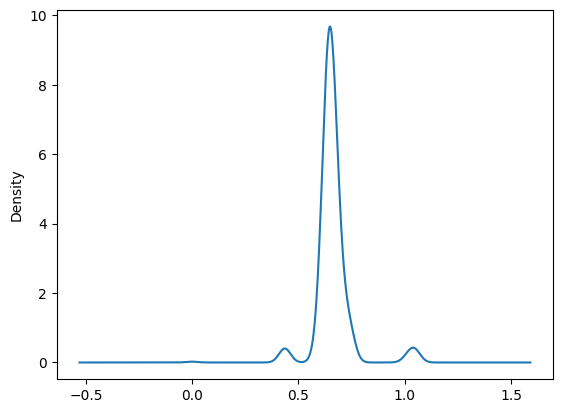

In [32]:
data['log_base'] = np.log1p(data['base'])

fig = px.histogram(data, x = 'log_base', nbins=50, histnorm='density', opacity=0.7)

fig.add_trace(
    go.Scatter(
        x = data['log_base'],
        y = data['log_base'].plot.kde(bw_method=0.3).get_lines()[0].get_data()[1],
        mode = 'lines',
        name = 'Densidad',
        line = dict(color = 'red')
    )
)

fig.update_layout(
    title = "Histograma de tarifa base con curva de densidad",
    xaxis_title = "Base",
    yaxis_title = "Densidad"
)

fig.show()